In [2]:
!pip install healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 13.1 MB/s eta 0:00:00


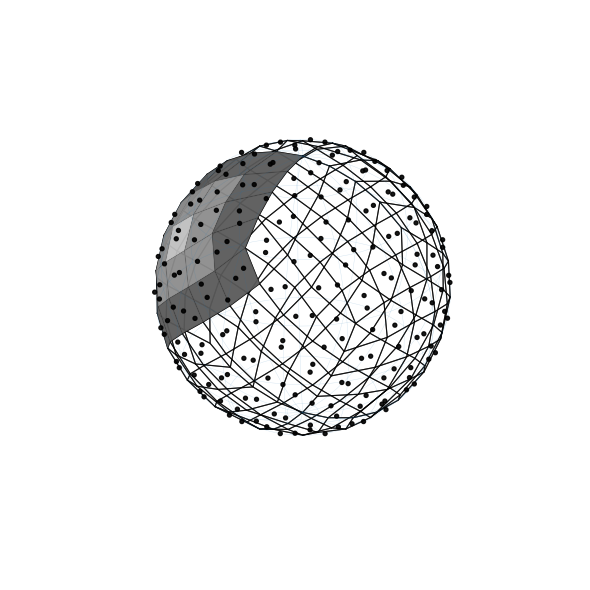

In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# --- settings ---
nside = 4            # ↑ increase for a finer mesh (e.g., 8 or 16)
line_width = 0.8     # pixel border thickness
dot_size = 8         # pixel center size
# -----------------

npix = hp.nside2npix(nside)
pix = np.arange(npix)

# Figure & sphere outline
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_box_aspect((1, 1, 1))
ax.axis("off")

# Light sphere wireframe for context
u = np.linspace(0, 2*np.pi, 60)
v = np.linspace(0, np.pi, 30)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))
ax.plot_wireframe(x, y, z, rstride=4, cstride=4, linewidth=0.3, alpha=0.2)

# Draw pixel borders
for p in pix:
    b = hp.boundaries(nside, p, step=1, nest=False)  # (3, N), unit vectors on the sphere
    bx, by, bz = b
    bx = np.append(bx, bx[0]); by = np.append(by, by[0]); bz = np.append(bz, bz[0])  # close loop
    ax.plot(bx, by, bz, linewidth=line_width, color="black", alpha=0.75)

# Scatter pixel centers
cx, cy, cz = hp.pix2vec(nside, pix)
ax.scatter(cx, cy, cz, s=dot_size, color="black", alpha=0.9)

# Shade a contiguous patch (seed + two neighbor rings → 3 tones)
theta0 = np.deg2rad(55); phi0 = np.deg2rad(220)
seed = hp.ang2pix(nside, theta0, phi0, nest=False)

rings = [{seed}]
seen = {seed}
for _ in range(2):  # grow two rings
    new = set()
    for q in rings[-1]:
        neigh = hp.get_all_neighbours(nside, q)
        for nn in neigh[neigh >= 0]:
            if int(nn) not in seen:
                new.add(int(nn)); seen.add(int(nn))
    rings.append(new)

shades = [0.75, 0.55, 0.35]  # light → dark
polys, colors = [], []
for k, ring in enumerate(rings):
    for p in ring:
        verts = hp.boundaries(nside, p, step=1, nest=False).T  # (N, 3)
        polys.append(verts)
        colors.append((shades[k], shades[k], shades[k], 0.95))

ax.add_collection3d(Poly3DCollection(polys, facecolors=colors, edgecolor="none"))
plt.tight_layout()
plt.show()